# ML Basics, warming up with small data

In [39]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Automatically created module for IPython interactive environment


### Read poll data

In [40]:
dfInit = pd.read_csv(('./Data/MUSA-650WelcomePoll.csv'))
dfInit.head()

,Timestamp,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?,Q4_General background in machine learning?,Q5_Hands-on experience in running machine learning applications?,Q6_Which one would you prefer on a Sunday afternoon?,Q7_Hands-on experience in image analysis using satellite images?,Q8_Level of interest in mathematics?,Q9_Level of interest in reading?,Q10_Level of stress about this class?,Q11_Your overall motivation about this class?
0,2020/01/14 5:11:10 PM EST,8,5,4,6,7,Running,5,3,5,7,3
1,2020/01/14 5:15:45 PM EST,8,8,5,5,6,Reading,7,7,6,7,8
2,2020/01/14 10:10:14 PM EST,6,6,6,6,5,Watching a movie,7,7,7,7,7
3,2020/01/15 10:02:48 AM EST,5,3,6,4,4,Watching a movie,3,8,8,5,10
4,2020/01/15 10:03:20 AM EST,6,6,5,4,3,Reading,4,5,4,10,8


### Calculate relative timestamp

In [41]:
dfInit.Timestamp = pd.to_datetime(dfInit.Timestamp, format='%Y/%m/%d %I:%M:%S %p EST')
dfInit['tsRel'] = (dfInit.Timestamp - dfInit.Timestamp.min()).dt.total_seconds()
dfInit[['Timestamp', 'tsRel']].head(10)

,Timestamp,tsRel
0,2020-01-14 17:11:10,0.0
1,2020-01-14 17:15:45,275.0
2,2020-01-14 22:10:14,17944.0
3,2020-01-15 10:02:48,60698.0
4,2020-01-15 10:03:20,60730.0
5,2020-01-15 10:03:43,60753.0
6,2020-01-15 10:03:50,60760.0
7,2020-01-15 10:03:53,60763.0
8,2020-01-15 10:03:59,60769.0
9,2020-01-15 10:04:03,60773.0


### Column names

In [42]:
df = dfInit[dfInit.columns[1:]]
initCol = df.columns.tolist()
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?',
 'Q4_General background in machine learning?',
 'Q5_Hands-on experience in running machine learning applications?',
 'Q6_Which one would you prefer on a Sunday afternoon?',
 'Q7_Hands-on experience in image analysis using satellite images?',
 'Q8_Level of interest in mathematics?',
 'Q9_Level of interest in reading?',
 'Q10_Level of stress about this class?',
 'Q11_Your overall motivation about this class?',
 'tsRel']

In [43]:
df.columns = df.columns.str.split('_').str[0].tolist()
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,tsRel
0,8,5,4,6,7,Running,5,3,5,7,3,0.0
1,8,8,5,5,6,Reading,7,7,6,7,8,275.0
2,6,6,6,6,5,Watching a movie,7,7,7,7,7,17944.0
3,5,3,6,4,4,Watching a movie,3,8,8,5,10,60698.0
4,6,6,5,4,3,Reading,4,5,4,10,8,60730.0


### Visualize correlations

In [44]:
#sns.pairplot(df, kind = 'reg')

In [45]:
df.corr(numeric_only=True)

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel
Q1,1.000000,0.766725,0.713877,0.624063,0.738857,0.676150,0.405270,-0.244388,-0.441883,0.042206,0.313668
Q2,0.766725,1.000000,0.639008,0.481836,0.568244,0.692275,0.399874,-0.321784,-0.329991,0.099348,0.383485
Q3,0.713877,0.639008,1.000000,0.564825,0.544057,0.616467,0.596732,-0.083087,-0.631657,0.400580,0.457261
Q4,0.624063,0.481836,0.564825,1.000000,0.945541,0.450752,0.426714,-0.461877,-0.168868,0.036739,0.440323
Q5,0.738857,0.568244,0.544057,0.945541,1.000000,0.444940,0.467669,-0.463201,-0.263556,-0.023930,0.407507
Q7,0.676150,0.692275,0.616467,0.450752,0.444940,1.000000,0.184545,-0.198770,-0.284418,0.045276,0.152171
Q8,0.405270,0.399874,0.596732,0.426714,0.467669,0.184545,1.000000,-0.126656,-0.205698,0.501068,0.036620
Q9,-0.244388,-0.321784,-0.083087,-0.461877,-0.463201,-0.198770,-0.126656,1.000000,-0.217410,0.228420,-0.193531
Q10,-0.441883,-0.329991,-0.631657,-0.168868,-0.263556,-0.284418,-0.205698,-0.217410,1.000000,-0.133846,-0.311850
Q11,0.042206,0.099348,0.400580,0.036739,-0.023930,0.045276,0.501068,0.228420,-0.133846,1.000000,0.430875


<Axes: >

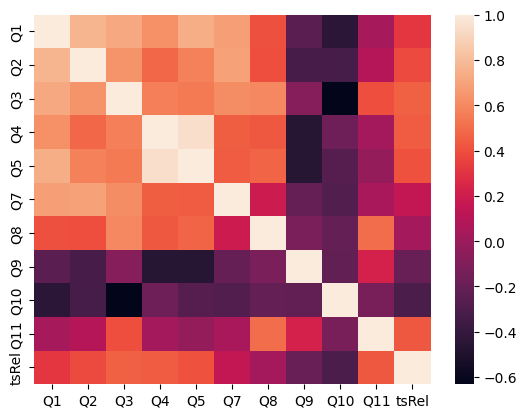

In [46]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [47]:
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?',
 'Q4_General background in machine learning?',
 'Q5_Hands-on experience in running machine learning applications?',
 'Q6_Which one would you prefer on a Sunday afternoon?',
 'Q7_Hands-on experience in image analysis using satellite images?',
 'Q8_Level of interest in mathematics?',
 'Q9_Level of interest in reading?',
 'Q10_Level of stress about this class?',
 'Q11_Your overall motivation about this class?',
 'tsRel']

### Handling categorical variables (visualization)

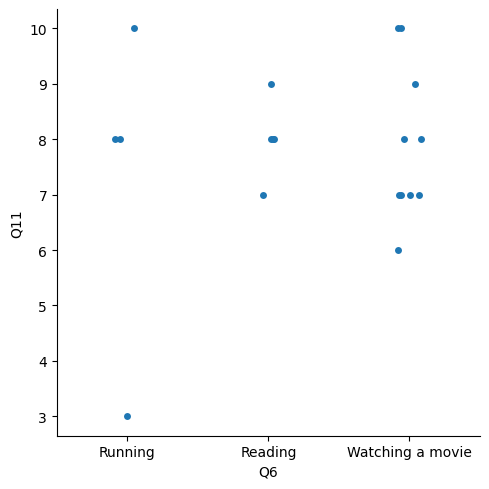

In [48]:
sns.catplot(x="Q6", y="Q11", data=df);

### Handling categorical variables (Data analysis)

In [49]:
df2 = pd.get_dummies(df, columns=['Q6'], dtype=float)

In [50]:
df2

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,Q6_Reading,Q6_Running,Q6_Watching a movie
0,8,5,4,6,7,5,3,5,7,3,0.0,0.0,1.0,0.0
1,8,8,5,5,6,7,7,6,7,8,275.0,1.0,0.0,0.0
2,6,6,6,6,5,7,7,7,7,7,17944.0,0.0,0.0,1.0
3,5,3,6,4,4,3,8,8,5,10,60698.0,0.0,0.0,1.0
4,6,6,5,4,3,4,5,4,10,8,60730.0,1.0,0.0,0.0
5,8,7,8,3,3,8,4,10,2,8,60753.0,0.0,1.0,0.0
6,4,3,1,1,1,1,1,10,8,8,60760.0,1.0,0.0,0.0
7,7,3,7,6,5,4,6,8,6,9,60763.0,1.0,0.0,0.0
8,5,5,5,4,4,4,4,5,5,7,60769.0,0.0,0.0,1.0
9,6,6,6,6,6,4,6,6,5,6,60773.0,0.0,0.0,1.0


In [51]:
dfTmp = df2[['Q8', 'Q9', 'Q10', 'Q11', 'Q6_Reading', 'Q6_Running', 'Q6_Watching a movie',]].copy()

In [52]:
#sns.pairplot(dfTmp, kind = 'reg')

<Axes: >

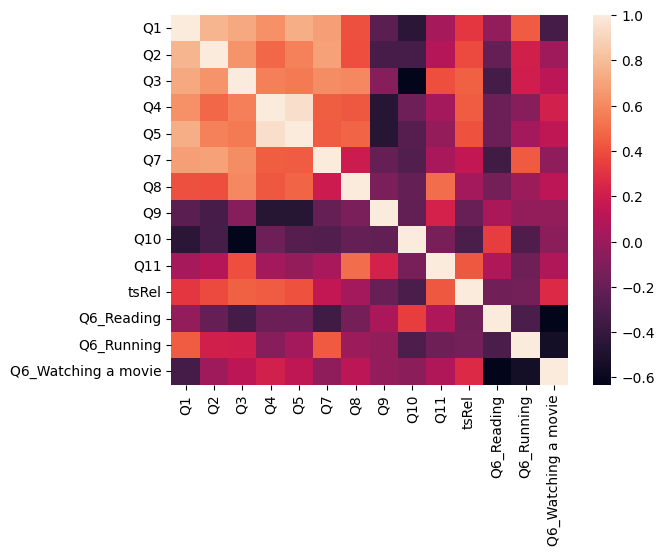

In [53]:
corr = df2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Dealing with outliers (focusing on tsRel)

### Visualize data

In [54]:
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?',
 'Q4_General background in machine learning?',
 'Q5_Hands-on experience in running machine learning applications?',
 'Q6_Which one would you prefer on a Sunday afternoon?',
 'Q7_Hands-on experience in image analysis using satellite images?',
 'Q8_Level of interest in mathematics?',
 'Q9_Level of interest in reading?',
 'Q10_Level of stress about this class?',
 'Q11_Your overall motivation about this class?',
 'tsRel']

#### Q: Is there a correlation between how fast a student answered the poll and answers to questions?

tsRel    1.000000
Q3       0.457261
Q10     -0.311850
Q11      0.430875
Name: tsRel, dtype: float64


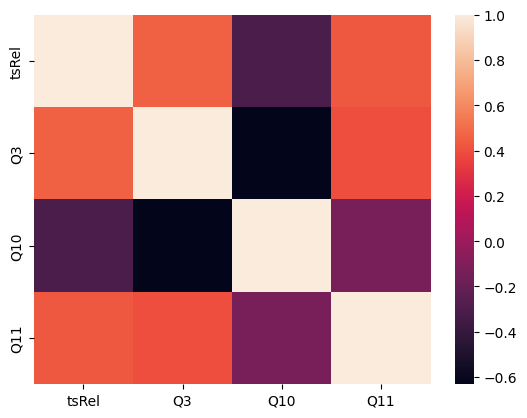

In [55]:
dfTmp = df[['tsRel','Q3', 'Q10', 'Q11']].copy()
corr = dfTmp.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
print(corr['tsRel'])

#### WARNING: Outliers may lead to incorrect conclusions!

<Axes: xlabel='tsRel', ylabel='Q3'>

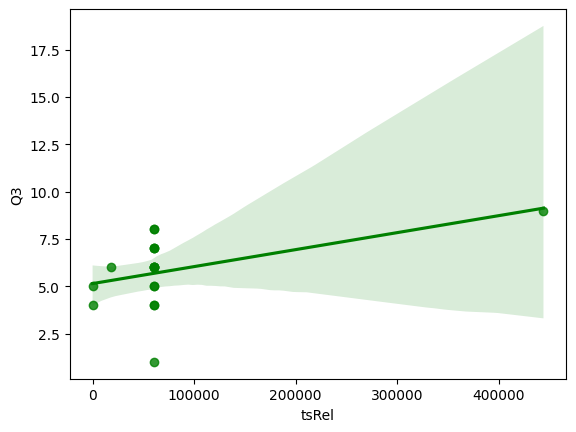

In [56]:
sns.regplot(x='tsRel', y='Q3', data=dfTmp, color="g")

<Axes: xlabel='tsRel', ylabel='Density'>

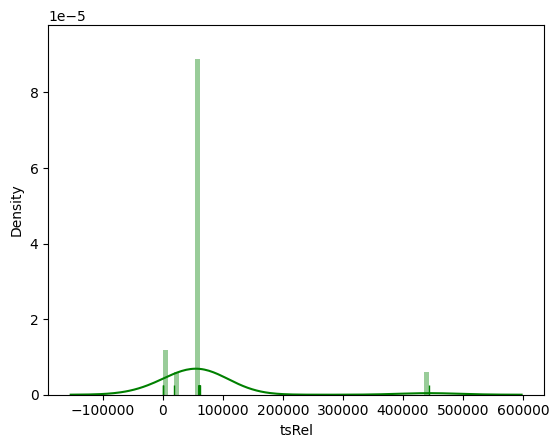

In [57]:
sns.distplot(dfTmp.tsRel, hist=True, rug=True, color="g")

### What is an outlier? Let's zoom into the data

(0.0, 100000.0)

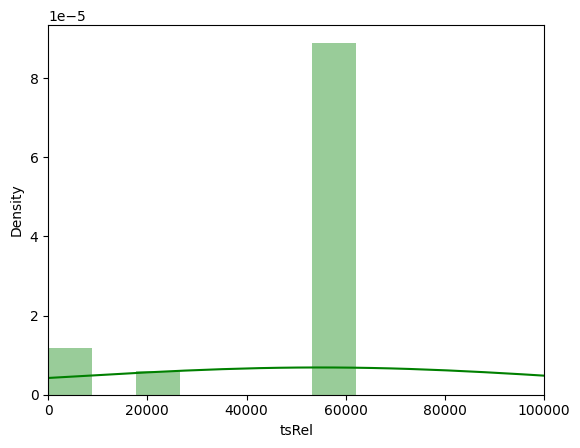

In [58]:
ax = sns.distplot(dfTmp.tsRel, hist = True, color="g")
ax.set_xlim(0, 100000)
#ax.set_ylim(0, 0.008)

In [59]:
dfTmp.tsRel.median()

60773.0

In [60]:
dfTmp.tsRel - dfTmp.tsRel.median()

0     -60773.0
1     -60498.0
2     -42829.0
3        -75.0
4        -43.0
5        -20.0
6        -13.0
7        -10.0
8         -4.0
9          0.0
10        10.0
11        17.0
12        27.0
13        28.0
14        39.0
15        44.0
16        50.0
17       166.0
18    383183.0
Name: tsRel, dtype: float64

In [61]:
dfInit.Timestamp

0    2020-01-14 17:11:10
1    2020-01-14 17:15:45
2    2020-01-14 22:10:14
3    2020-01-15 10:02:48
4    2020-01-15 10:03:20
5    2020-01-15 10:03:43
6    2020-01-15 10:03:50
7    2020-01-15 10:03:53
8    2020-01-15 10:03:59
9    2020-01-15 10:04:03
10   2020-01-15 10:04:13
11   2020-01-15 10:04:20
12   2020-01-15 10:04:30
13   2020-01-15 10:04:31
14   2020-01-15 10:04:42
15   2020-01-15 10:04:47
16   2020-01-15 10:04:53
17   2020-01-15 10:06:49
18   2020-01-19 20:30:26
Name: Timestamp, dtype: datetime64[ns]

### Detect outliers

### What about using standard scaling (z-score transformation) + thresholding
#### Typical outlier threshold:  more than +- 2 std. (z<-2 or z>2)

<img src="Images/NormalDist.png">

In [62]:
tsRel_z = (dfTmp.tsRel - dfTmp.tsRel.mean()) / dfTmp.tsRel.std()
tsRel_z

0    -0.783125
1    -0.780147
2    -0.588803
3    -0.125805
4    -0.125459
5    -0.125209
6    -0.125134
7    -0.125101
8    -0.125036
9    -0.124993
10   -0.124885
11   -0.124809
12   -0.124700
13   -0.124690
14   -0.124571
15   -0.124516
16   -0.124451
17   -0.123195
18    4.024628
Name: tsRel, dtype: float64

### Outlier detection is a serious task!

#### SciKit methods

<img src="Images/outlierScikit.png">

### Example: a more advanced outlier detection

In [63]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model for outlier detection (default)
X = np.array(dfTmp.tsRel).reshape(dfTmp.shape[0],1)
X.shape
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
clf.fit_predict(X)
dfTmp['outScore'] = clf.negative_outlier_factor_.tolist()
dfTmp

,tsRel,Q3,Q10,Q11,outScore
0,0.0,4,7,3,-971.093118
1,275.0,5,7,8,-969.221765
2,17944.0,6,7,7,-848.985675
3,60698.0,6,5,10,-2.550890
4,60730.0,5,10,8,-1.646488
5,60753.0,8,2,8,-1.071656
6,60760.0,1,8,8,-0.988349
7,60763.0,7,6,9,-0.988349
8,60769.0,5,5,7,-1.012356
9,60773.0,6,5,6,-1.025628


<Axes: xlabel='tsRel', ylabel='outScore'>

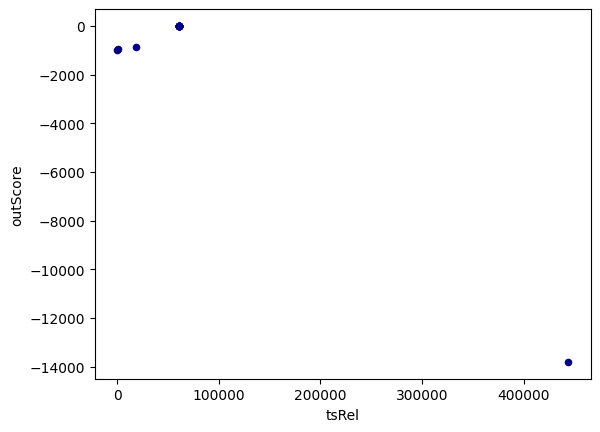

In [64]:
dfTmp.plot.scatter(x='tsRel', y='outScore', c='DarkBlue')

### Correlations for filtered data

In [65]:
dfTmpFil = dfTmp[np.logical_and(dfTmp.outScore>-5, dfTmp.outScore<5)]
dfTmpFil

,tsRel,Q3,Q10,Q11,outScore
3,60698.0,6,5,10,-2.550890
4,60730.0,5,10,8,-1.646488
5,60753.0,8,2,8,-1.071656
6,60760.0,1,8,8,-0.988349
7,60763.0,7,6,9,-0.988349
8,60769.0,5,5,7,-1.012356
9,60773.0,6,5,6,-1.025628
10,60783.0,4,8,7,-0.890923
11,60790.0,7,5,8,-0.915438
12,60800.0,8,6,8,-1.035467


<Axes: xlabel='tsRel', ylabel='Density'>

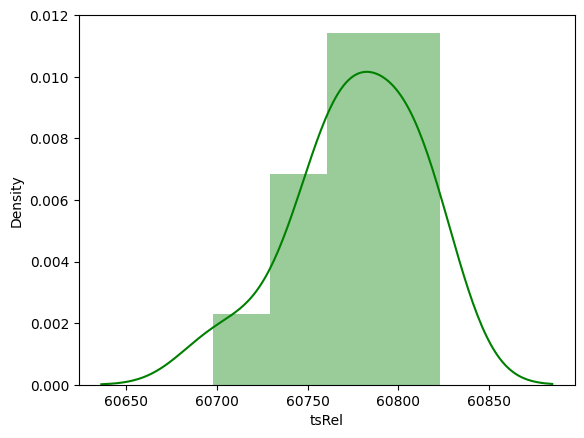

In [66]:
sns.distplot(dfTmpFil.tsRel, hist = True, color="g")

tsRel       1.000000
Q3          0.130838
Q10        -0.163241
Q11        -0.344576
outScore    0.702471
Name: tsRel, dtype: float64


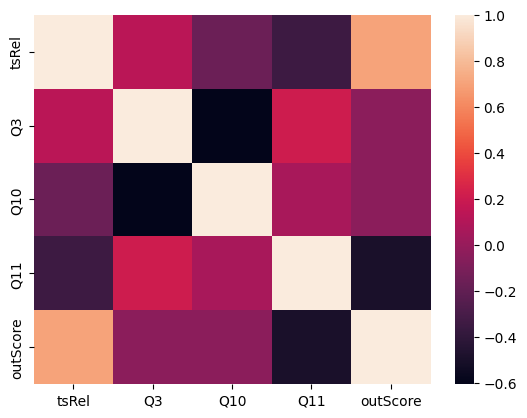

In [67]:
corr = dfTmpFil.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
print(corr['tsRel'])

<Axes: xlabel='tsRel', ylabel='Q3'>

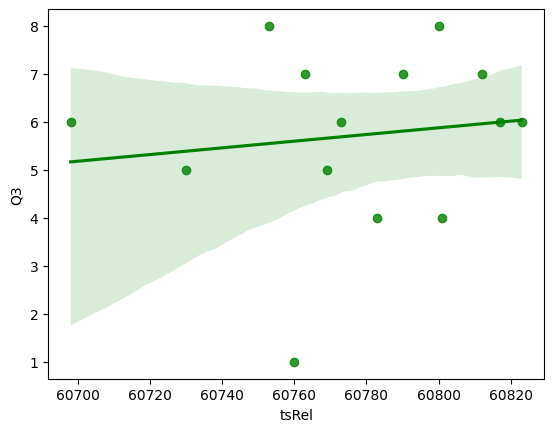

In [68]:
sns.regplot(x='tsRel', y='Q3', data=dfTmpFil, color="g")

In [69]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,tsRel
0,8,5,4,6,7,Running,5,3,5,7,3,0.0
1,8,8,5,5,6,Reading,7,7,6,7,8,275.0
2,6,6,6,6,5,Watching a movie,7,7,7,7,7,17944.0
3,5,3,6,4,4,Watching a movie,3,8,8,5,10,60698.0
4,6,6,5,4,3,Reading,4,5,4,10,8,60730.0
5,8,7,8,3,3,Running,8,4,10,2,8,60753.0
6,4,3,1,1,1,Reading,1,1,10,8,8,60760.0
7,7,3,7,6,5,Reading,4,6,8,6,9,60763.0
8,5,5,5,4,4,Watching a movie,4,4,5,5,7,60769.0
9,6,6,6,6,6,Watching a movie,4,6,6,5,6,60773.0


### Dimensionality reduction

[9.99999996e-01 1.81226177e-09 6.72112392e-10 5.91733094e-10
 3.30434976e-10]
0.9999999994658001


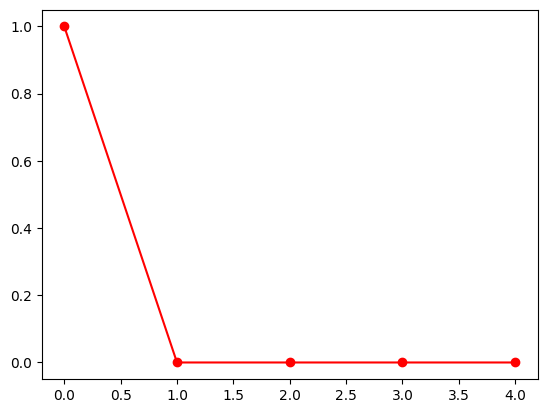

In [70]:
mdlPCA = PCA(n_components=5)
XPCA = mdlPCA.fit_transform(df2)

print(mdlPCA.explained_variance_ratio_)
print(np.sum(mdlPCA.explained_variance_ratio_))
plt.plot(np.arange(0,mdlPCA.explained_variance_ratio_.shape[0]), mdlPCA.explained_variance_ratio_, '-ro')

[ 5.23403869e-06  7.40036105e-06  8.97709992e-06  9.61319140e-06
  9.32793474e-06  3.94503126e-06  8.95009702e-07 -3.58017421e-06
 -6.06213801e-06  7.55257058e-06  1.00000000e+00 -7.70261980e-07
 -6.96515391e-07  1.46677737e-06]


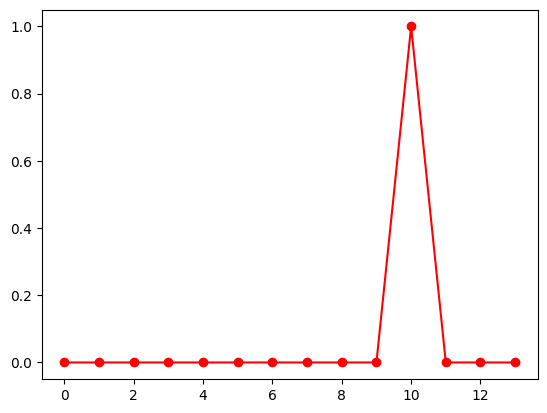

In [71]:
print(mdlPCA.components_[0,:])
plt.plot(np.arange(0,mdlPCA.components_[0,:].shape[0]), mdlPCA.components_[0,:], '-ro')

### Question: What is "wrong" in the data?

In [72]:
df2.describe()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,Q6_Reading,Q6_Running,Q6_Watching a movie
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.473684,5.789474,5.789474,4.789474,4.631579,4.789474,5.736842,6.842105,6.000000,7.789474,72315.052632,0.263158,0.210526,0.526316
std,1.540866,1.781976,1.812884,2.016018,2.113726,2.393949,2.256893,1.708253,1.795055,1.618605,92341.691330,0.452414,0.418854,0.512989
min,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,5.500000,4.500000,5.000000,4.000000,3.000000,3.500000,4.500000,5.500000,5.000000,7.000000,60741.500000,0.000000,0.000000,0.000000
50%,7.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,7.000000,6.000000,8.000000,60773.000000,0.000000,0.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,8.000000,7.000000,8.500000,60806.500000,0.500000,0.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,10.000000,10.000000,10.000000,10.000000,443956.000000,1.000000,1.000000,1.000000


### Let's normalize the data

In [73]:
df2_norm = (df2-df2.min())/(df2.max()-df2.min())

In [74]:
df2_norm.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,Q6_Reading,Q6_Running,Q6_Watching a movie
0,0.8,0.333333,0.375,0.625,0.750,0.571429,0.222222,0.166667,0.625,0.000000,0.000000,0.0,1.0,0.0
1,0.8,0.833333,0.500,0.500,0.625,0.857143,0.666667,0.333333,0.625,0.714286,0.000619,1.0,0.0,0.0
2,0.4,0.500000,0.625,0.625,0.500,0.857143,0.666667,0.500000,0.625,0.571429,0.040418,0.0,0.0,1.0
3,0.2,0.000000,0.625,0.375,0.375,0.285714,0.777778,0.666667,0.375,1.000000,0.136721,0.0,0.0,1.0
4,0.4,0.500000,0.500,0.375,0.250,0.428571,0.444444,0.000000,1.000,0.714286,0.136793,1.0,0.0,0.0


In [75]:
df2_norm.describe()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,Q6_Reading,Q6_Running,Q6_Watching a movie
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.494737,0.464912,0.598684,0.473684,0.453947,0.541353,0.526316,0.473684,0.500000,0.684211,0.162888,0.263158,0.210526,0.526316
std,0.308173,0.296996,0.226611,0.252002,0.264216,0.341993,0.250766,0.284709,0.224382,0.231229,0.207997,0.452414,0.418854,0.512989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.250000,0.500000,0.375000,0.250000,0.357143,0.388889,0.250000,0.375000,0.571429,0.136819,0.000000,0.000000,0.000000
50%,0.600000,0.500000,0.625000,0.500000,0.500000,0.571429,0.555556,0.500000,0.500000,0.714286,0.136890,0.000000,0.000000,1.000000
75%,0.800000,0.666667,0.750000,0.625000,0.625000,0.857143,0.666667,0.666667,0.625000,0.785714,0.136965,0.500000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[0.31431827 0.29012089 0.15348486 0.07788586 0.04541328]
0.8812231522564273


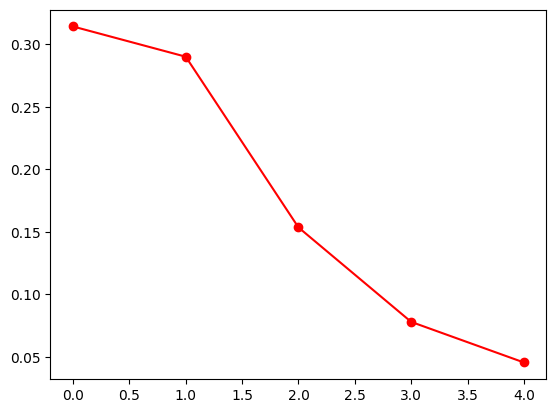

In [76]:
mdlPCA = PCA(n_components=5)
XPCA = mdlPCA.fit_transform(df2_norm)

print(mdlPCA.explained_variance_ratio_)
print(np.sum(mdlPCA.explained_variance_ratio_))

plt.plot(np.arange(0,mdlPCA.explained_variance_ratio_.shape[0]), mdlPCA.explained_variance_ratio_, '-ro')

[-0.28489905 -0.3141605  -0.26107415 -0.25405393 -0.27500032 -0.36871538
 -0.17301488  0.12875075  0.16485422 -0.03296608 -0.13459097  0.4957779
 -0.16340968 -0.33236822]


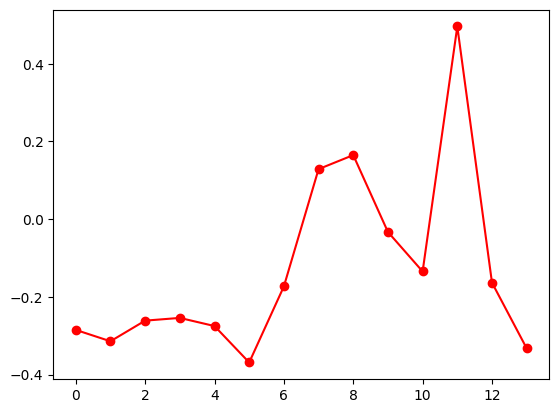

In [77]:
print(mdlPCA.components_[0,:])
plt.plot(np.arange(0,mdlPCA.components_[0,:].shape[0]), mdlPCA.components_[0,:], '-ro')

### Remove tsRel column

In [78]:
df2_noTs = df2_norm[df2_norm.columns[df2_norm.columns.str.contains('tsRel')==False]]
df2_noTs.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,Q6_Reading,Q6_Running,Q6_Watching a movie
0,0.8,0.333333,0.375,0.625,0.750,0.571429,0.222222,0.166667,0.625,0.000000,0.0,1.0,0.0
1,0.8,0.833333,0.500,0.500,0.625,0.857143,0.666667,0.333333,0.625,0.714286,1.0,0.0,0.0
2,0.4,0.500000,0.625,0.625,0.500,0.857143,0.666667,0.500000,0.625,0.571429,0.0,0.0,1.0
3,0.2,0.000000,0.625,0.375,0.375,0.285714,0.777778,0.666667,0.375,1.000000,0.0,0.0,1.0
4,0.4,0.500000,0.500,0.375,0.250,0.428571,0.444444,0.000000,1.000,0.714286,1.0,0.0,0.0


In [79]:
df2_noTs = df2_norm.drop(columns=['tsRel'])
df2_noTs.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,Q6_Reading,Q6_Running,Q6_Watching a movie
0,0.8,0.333333,0.375,0.625,0.750,0.571429,0.222222,0.166667,0.625,0.000000,0.0,1.0,0.0
1,0.8,0.833333,0.500,0.500,0.625,0.857143,0.666667,0.333333,0.625,0.714286,1.0,0.0,0.0
2,0.4,0.500000,0.625,0.625,0.500,0.857143,0.666667,0.500000,0.625,0.571429,0.0,0.0,1.0
3,0.2,0.000000,0.625,0.375,0.375,0.285714,0.777778,0.666667,0.375,1.000000,0.0,0.0,1.0
4,0.4,0.500000,0.500,0.375,0.250,0.428571,0.444444,0.000000,1.000,0.714286,1.0,0.0,0.0


[0.31894549 0.29885772 0.1547158  0.07966809 0.04678632]
0.8989734076370078


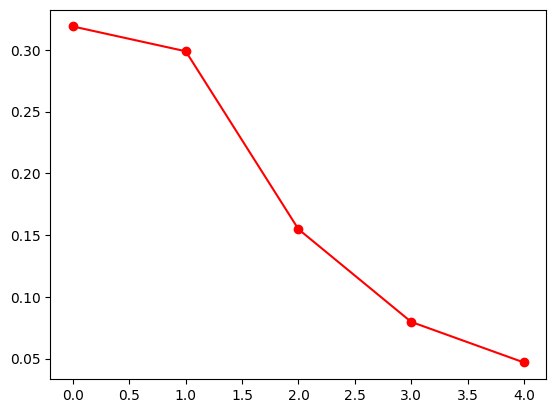

In [80]:
mdlPCA = PCA(n_components=5)
XPCA = mdlPCA.fit_transform(df2_noTs)

print(mdlPCA.explained_variance_ratio_)
print(np.sum(mdlPCA.explained_variance_ratio_))

plt.plot(np.arange(0,mdlPCA.explained_variance_ratio_.shape[0]), mdlPCA.explained_variance_ratio_, '-ro')

[-0.30244657 -0.32214438 -0.26410732 -0.25227651 -0.27659662 -0.3869891
 -0.17634825  0.12991123  0.1677439  -0.02453888  0.49300779 -0.20299601
 -0.29001178]


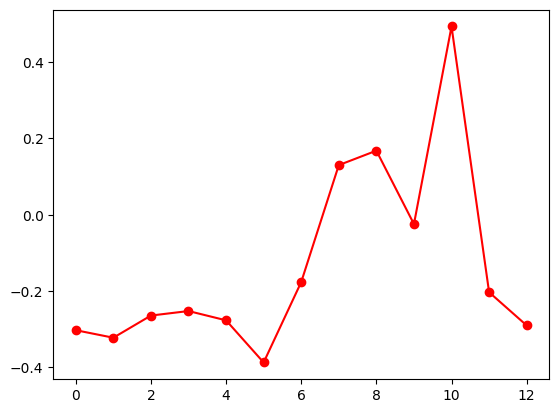

In [81]:
print(mdlPCA.components_[0,:])
plt.plot(np.arange(0,mdlPCA.components_[0,:].shape[0]), mdlPCA.components_[0,:], '-ro')

### Alternative approach: Keep tsRel, but exclude outliers

In [82]:
df2Fil = df2[np.logical_and(df2.tsRel>60000, df2.tsRel<61000)]
df2Fil_norm = (df2Fil-df2Fil.min())/(df2Fil.max()-df2Fil.min())
df2Fil_norm.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,Q6_Reading,Q6_Running,Q6_Watching a movie
3,0.25,0.0,0.714286,0.500000,0.500000,0.285714,0.777778,0.666667,0.375,1.00,0.000000,0.0,0.0,1.0
4,0.50,0.6,0.571429,0.500000,0.333333,0.428571,0.444444,0.000000,1.000,0.50,0.132780,1.0,0.0,0.0
5,1.00,0.8,1.000000,0.333333,0.333333,1.000000,0.333333,1.000000,0.000,0.50,0.228216,0.0,1.0,0.0
6,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.750,0.50,0.257261,1.0,0.0,0.0
7,0.75,0.0,0.857143,0.833333,0.666667,0.428571,0.555556,0.666667,0.500,0.75,0.269710,1.0,0.0,0.0


[0.34631596 0.27017825 0.14469026 0.07712654 0.05616314]
0.8944741480656594


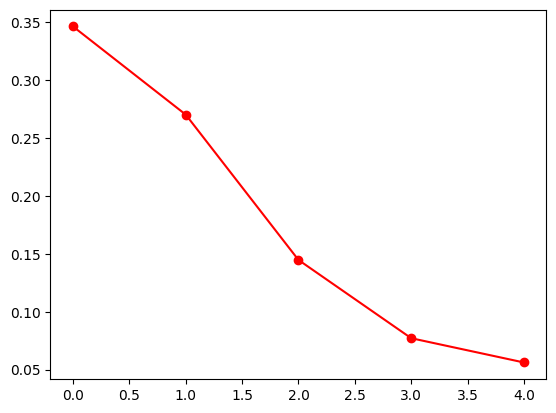

In [83]:
mdlPCA = PCA(n_components=5)
XPCA = mdlPCA.fit_transform(df2Fil_norm)

print(mdlPCA.explained_variance_ratio_)
print(np.sum(mdlPCA.explained_variance_ratio_))

plt.plot(np.arange(0,mdlPCA.explained_variance_ratio_.shape[0]), mdlPCA.explained_variance_ratio_, '-ro')

[-0.43656834 -0.36520933 -0.30003171 -0.22317841 -0.26032745 -0.38821589
 -0.21312891  0.05576004  0.17168435 -0.07017853 -0.05979342  0.27181642
 -0.3812503   0.10943387]


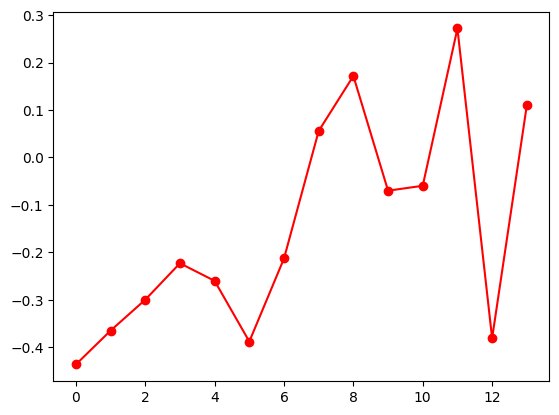

In [84]:
print(mdlPCA.components_[0,:])
plt.plot(np.arange(0,mdlPCA.components_[0,:].shape[0]), mdlPCA.components_[0,:], '-ro')

## Predictive models

#### Can we predict motivation?
#### Can we predict stress?

In [85]:
df3 = df2.drop(columns=['tsRel'])
df3_norm = (df3-df3.min())/(df3.max()-df3.min())
df3_norm.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,Q6_Reading,Q6_Running,Q6_Watching a movie
0,0.8,0.333333,0.375,0.625,0.750,0.571429,0.222222,0.166667,0.625,0.000000,0.0,1.0,0.0
1,0.8,0.833333,0.500,0.500,0.625,0.857143,0.666667,0.333333,0.625,0.714286,1.0,0.0,0.0
2,0.4,0.500000,0.625,0.625,0.500,0.857143,0.666667,0.500000,0.625,0.571429,0.0,0.0,1.0
3,0.2,0.000000,0.625,0.375,0.375,0.285714,0.777778,0.666667,0.375,1.000000,0.0,0.0,1.0
4,0.4,0.500000,0.500,0.375,0.250,0.428571,0.444444,0.000000,1.000,0.714286,1.0,0.0,0.0


### Select X and y
<img src="Images/ml_ill2.png" width="400">

In [87]:
colX = df3.columns[np.r_[0:8,10:13]]
colX.tolist()

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q7',
 'Q8',
 'Q9',
 'Q6_Reading',
 'Q6_Running',
 'Q6_Watching a movie']

In [88]:
colY = ['Q10']  # level of stress;
colY = ['Q11']  # level of motivation;

colY

['Q11']

In [89]:
X = np.array(df3[colX])
print(X.shape)
X

(19, 11)


array([[ 8.,  5.,  4.,  6.,  7.,  5.,  3.,  5.,  0.,  1.,  0.],
       [ 8.,  8.,  5.,  5.,  6.,  7.,  7.,  6.,  1.,  0.,  0.],
       [ 6.,  6.,  6.,  6.,  5.,  7.,  7.,  7.,  0.,  0.,  1.],
       [ 5.,  3.,  6.,  4.,  4.,  3.,  8.,  8.,  0.,  0.,  1.],
       [ 6.,  6.,  5.,  4.,  3.,  4.,  5.,  4.,  1.,  0.,  0.],
       [ 8.,  7.,  8.,  3.,  3.,  8.,  4., 10.,  0.,  1.,  0.],
       [ 4.,  3.,  1.,  1.,  1.,  1.,  1., 10.,  1.,  0.,  0.],
       [ 7.,  3.,  7.,  6.,  5.,  4.,  6.,  8.,  1.,  0.,  0.],
       [ 5.,  5.,  5.,  4.,  4.,  4.,  4.,  5.,  0.,  0.,  1.],
       [ 6.,  6.,  6.,  6.,  6.,  4.,  6.,  6.,  0.,  0.,  1.],
       [ 4.,  4.,  4.,  5.,  3.,  5.,  2.,  7.,  0.,  0.,  1.],
       [ 7.,  7.,  7.,  2.,  2.,  7.,  6.,  7.,  0.,  1.,  0.],
       [ 8.,  8.,  8.,  6.,  6.,  8.,  7.,  8.,  0.,  0.,  1.],
       [ 4.,  4.,  4.,  1.,  1.,  1.,  5.,  7.,  0.,  0.,  1.],
       [ 8.,  7.,  7.,  7.,  7.,  7., 10.,  5.,  0.,  1.,  0.],
       [ 7.,  7.,  6.,  6.,  6.,  6.,  6

In [90]:
y = np.array(df3[colY])
print(y.shape)
y

(19, 1)


array([[ 3],
       [ 8],
       [ 7],
       [10],
       [ 8],
       [ 8],
       [ 8],
       [ 9],
       [ 7],
       [ 6],
       [ 7],
       [ 8],
       [ 8],
       [ 8],
       [10],
       [ 7],
       [ 7],
       [ 9],
       [10]])

### Normalize data

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

scaler.fit(X)
Xnorm = scaler.transform(X)
Xnorm.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [92]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#### Cross validation with leave one out

In [93]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train_index, test_index in loo.split(Xnorm):
    print('TRAIN: ' + str(train_index) + '  TEST: ' +  str(test_index))


TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]  TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]  TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]  TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]  TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18]  TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18]  TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18]  TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18]  TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18]  TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18]  TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18]  TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18]  TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18]  TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8 

In [94]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVR

loo = LeaveOneOut()

predAll = np.zeros([y.shape[0],1])

i=0
for train_index, test_index in loo.split(Xnorm):

    X_train, X_test = Xnorm[train_index], Xnorm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regr = LinearSVR(random_state=0, tol=1e-5)
    
    regr.fit(X_train, y_train)  #  Train the model

    ypred = regr.predict(X_test)  #  Apply the model
    
    predAll[i] = ypred
    
    print('Y : ' + str(y_test) + ' , pred as: ' + str(ypred))
    i = i + 1 


Y : [[3]] , pred as: [6.71770473]
Y : [[8]] , pred as: [8.44358673]
Y : [[7]] , pred as: [8.57175498]
Y : [[10]] , pred as: [7.62213136]
Y : [[8]] , pred as: [6.70446542]
Y : [[8]] , pred as: [8.9269527]
Y : [[8]] , pred as: [5.14777884]
Y : [[9]] , pred as: [8.02397316]
Y : [[7]] , pred as: [6.22595715]
Y : [[6]] , pred as: [7.94496256]
Y : [[7]] , pred as: [6.21621235]
Y : [[8]] , pred as: [7.00076291]
Y : [[8]] , pred as: [9.45348764]
Y : [[8]] , pred as: [6.27163448]
Y : [[10]] , pred as: [6.519619]
Y : [[7]] , pred as: [8.10618284]
Y : [[7]] , pred as: [8.58400087]
Y : [[9]] , pred as: [7.92971992]
Y : [[10]] , pred as: [6.78948034]


In [95]:
np.corrcoef(y.T, predAll.T)

array([[1.        , 0.01086243],
       [0.01086243, 1.        ]])

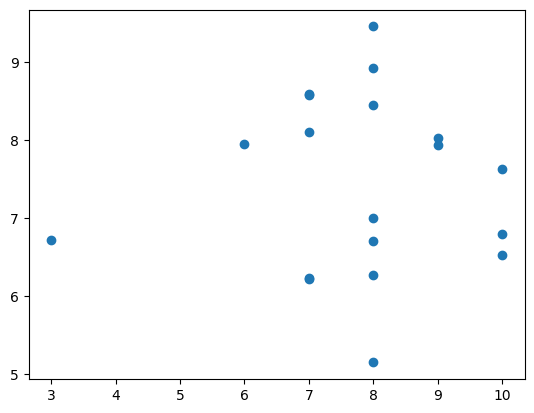

In [96]:
plt.scatter(y.T, predAll.T)